In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries install

## Libraries import

In [2]:
import yfinance as yf
import pandas as pd


## Using the yfinance ("Yahoo Finance API wrapper") Library to Extract Stock Data


## Ticker object

* Using the "Ticker" module we can create an object that will allow us to access functions to extract data.

* To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is "`AAPL`".

* Simple analogy ==> requests.get("https://query1.finance.yahoo.com/...") but yfinance library call internally URLs so Don't manually type URL.

  

In [3]:
apple = yf.Ticker("AAPL")   
 

## Stock info (Dictionary)

In [4]:
import yfinance as yf

apple = yf.Ticker("AAPL")
apple_info = apple.info

apple_info['country'], apple_info['sector'] 

# print(apple_info['country'] ,",", apple_info['sector'])

('United States', 'Technology')

# OR

In [5]:
print(f"Country : {apple_info['country']}")
print(f"Sector  : {apple_info['sector']}")


Country : United States
Sector  : Technology


## Extracting Share Price

* the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.



In [6]:
apple_price = apple.history(period="max")
apple_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098389,0.098817,0.098389,0.098389,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-18 00:00:00-05:00,273.609985,273.630005,266.950012,272.190002,51630700,0.0,0.0
2025-12-19 00:00:00-05:00,272.149994,274.600006,269.899994,273.670013,144632000,0.0,0.0
2025-12-22 00:00:00-05:00,272.859985,273.880005,270.510010,270.970001,36571800,0.0,0.0


### Apple IPO Date:

* ### SIMPLE & CLEAR

In [7]:
ipo_date = apple_price.index[0]
print("🚀 Apple IPO Date:", ipo_date.date())


🚀 Apple IPO Date: 1980-12-12


*  ### MARKDOWN-STYLE

In [8]:
from IPython.display import Markdown, display

ipo_date = apple_price.index[0]
display(Markdown(f"### 📈 Apple IPO Date: **{ipo_date.date()}**"))


### 📈 Apple IPO Date: **1980-12-12**

In [9]:
apple_price.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098389,0.098817,0.098389,0.098389,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093684,0.093684,0.093256,0.093256,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086839,0.086839,0.086412,0.086412,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088550,0.088978,0.088550,0.088550,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091118,0.091545,0.091118,0.091118,73449600,0.0,0.0


## reset_index()

* Reset the index of the DataFrame with the "`reset_index`" function. We also set the "`inplace`" paramter to "`True`" so the change takes place to the DataFrame itself.

In [10]:
apple_price.reset_index(inplace=True)

## plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

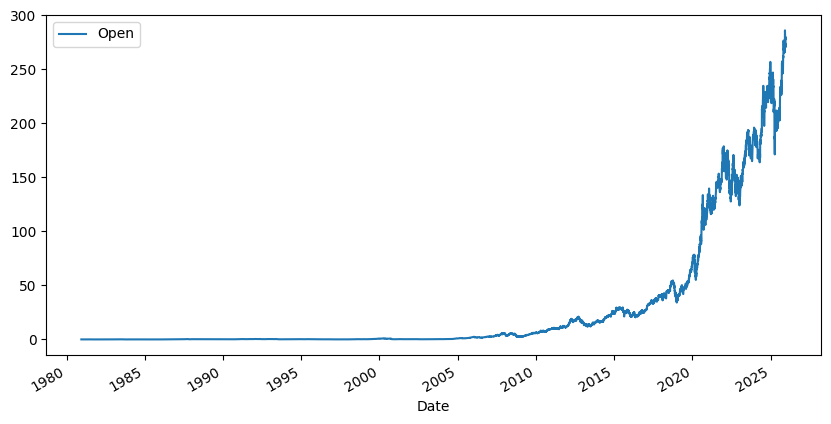

In [11]:
apple_price.plot(x="Date", y="Open", figsize=(10,5))


## Extracting Dividends with Dividends data

* Using the variable "`dividends`" we can get a dataframe of the data. The period of the data is given by the period defined in the "'history`" function.



In [12]:
apple.dividends


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
2025-11-10 00:00:00-05:00    0.260000
Name: Dividends, Length: 89, dtype: float64

In [13]:
apple.dividends.head()

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
Name: Dividends, dtype: float64

<Axes: xlabel='Date'>

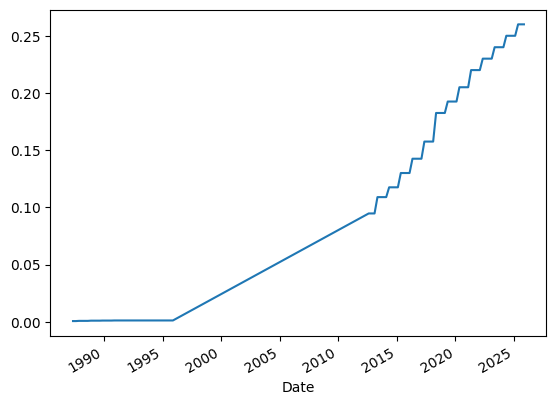

In [14]:
apple.dividends.plot()

### what is the Volume of AMD traded on the first day (first row)?

In [15]:
import yfinance as yf

amd = yf.Ticker("AMD")
amd_history = amd.history(period="max")

amd_history.iloc[0]['Volume']


np.float64(219600.0)